# 📊 Spark Project on Stock Analysis  
## 🚗 Tata Motors Stock Analysis  

---

### 👥 Group 9 - *Data Pirates*

**Team Members:**
1. Prashant Gupta  
2. Pratish Kulkarni  
3. Omkar Jagdale  
4. Prathamesh Lohar  
5. Prasad Bhat  
6. Prapti Kinare  

---

#Phase 1

In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.window import Window

In [ ]:
import os #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #set environment variable
  !java -version #check java version
install_java()

openjdk version "1.8.0_462"
OpenJDK Runtime Environment (build 1.8.0_462-8u462-ga~us1-0ubuntu2~22.04.2-b08)
OpenJDK 64-Bit Server VM (build 25.462-b08, mixed mode)


In [ ]:
spark = SparkSession.builder.appName("TATA MOTORS").getOrCreate()

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
from pyspark.sql.types import *

In [ ]:
!wget https://github.com/prashant-gtx/PG-DBDA-Prashant/blob/main/Module%205%20-%20Big%20Data%20Analysis/Assignments/TATAMOTORS.csv

--2025-11-09 13:13:18--  https://github.com/prashant-gtx/PG-DBDA-Prashant/blob/main/Module%205%20-%20Big%20Data%20Analysis/Assignments/TATAMOTORS.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘TATAMOTORS.csv.2’

TATAMOTORS.csv.2        [ <=>                ]   1.18M  --.-KB/s    in 0.08s   

2025-11-09 13:13:18 (15.7 MB/s) - ‘TATAMOTORS.csv.2’ saved [1237614]



In [ ]:
df = spark.read.csv("TATAMOTORS.csv", header=True, inferSchema=True)
df.show(10)

+--------------------+------------------+------------------+------------------+------------------+------------------+-------------+
|               Price|         Adj Close|             Close|              High|               Low|              Open|       Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+-------------+
|              Ticker|     TATAMOTORS.NS|     TATAMOTORS.NS|     TATAMOTORS.NS|     TATAMOTORS.NS|     TATAMOTORS.NS|TATAMOTORS.NS|
|                Date|              NULL|              NULL|              NULL|              NULL|              NULL|         NULL|
|1991-01-02 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|            0|
|1991-01-03 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|            0|
|1991-01-04 00:00:...|15.690223693847656|21.857864379882812|21.8578643798828

In [ ]:
df.show(10)

+--------------------+------------------+------------------+------------------+------------------+------------------+-------------+
|               Price|         Adj Close|             Close|              High|               Low|              Open|       Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+-------------+
|              Ticker|     TATAMOTORS.NS|     TATAMOTORS.NS|     TATAMOTORS.NS|     TATAMOTORS.NS|     TATAMOTORS.NS|TATAMOTORS.NS|
|                Date|              NULL|              NULL|              NULL|              NULL|              NULL|         NULL|
|1991-01-02 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|            0|
|1991-01-03 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|            0|
|1991-01-04 00:00:...|15.690223693847656|21.857864379882812|21.8578643798828

In [ ]:
removed_lines_df=  df.rdd.zipWithIndex()

In [ ]:
rdd = removed_lines_df.filter(lambda x: x[1] > 1).map(lambda x: x[0])

In [ ]:
for var in rdd.take(10):
  print(var)

Row(Price='1991-01-02 00:00:00+00:00', Adj Close='15.690223693847656', Close='21.857864379882812', High='21.857864379882812', Low='20.959596633911133', Open='20.959596633911133', Volume='0')
Row(Price='1991-01-03 00:00:00+00:00', Adj Close='15.690223693847656', Close='21.857864379882812', High='21.857864379882812', Low='20.959596633911133', Open='20.959596633911133', Volume='0')
Row(Price='1991-01-04 00:00:00+00:00', Adj Close='15.690223693847656', Close='21.857864379882812', High='21.857864379882812', Low='21.857864379882812', Open='21.857864379882812', Volume='0')
Row(Price='1991-01-07 00:00:00+00:00', Adj Close='15.152884483337402', Close='21.10930824279785', High='21.25901985168457', Low='20.061328887939453', Open='20.360750198364258', Volume='0')
Row(Price='1991-01-08 00:00:00+00:00', Adj Close='15.152884483337402', Close='21.10930824279785', High='21.10930824279785', Low='21.10930824279785', Open='21.10930824279785', Volume='0')
Row(Price='1991-01-09 00:00:00+00:00', Adj Close='1

In [ ]:
df1=rdd.toDF(df.schema)

In [ ]:
df1.show(10)

+--------------------+------------------+------------------+------------------+------------------+------------------+------+
|               Price|         Adj Close|             Close|              High|               Low|              Open|Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+------+
|1991-01-02 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|     0|
|1991-01-03 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|     0|
|1991-01-04 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|21.857864379882812|21.857864379882812|     0|
|1991-01-07 00:00:...|15.152884483337402| 21.10930824279785| 21.25901985168457|20.061328887939453|20.360750198364258|     0|
|1991-01-08 00:00:...|15.152884483337402| 21.10930824279785| 21.10930824279785| 21.10930824279785| 21.10930824279785|     0|


In [ ]:
df2=df1.withColumnRenamed("Price","Date")

In [ ]:
df2.show(10)

+--------------------+------------------+------------------+------------------+------------------+------------------+------+
|                Date|         Adj Close|             Close|              High|               Low|              Open|Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+------+
|1991-01-02 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|     0|
|1991-01-03 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|     0|
|1991-01-04 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|21.857864379882812|21.857864379882812|     0|
|1991-01-07 00:00:...|15.152884483337402| 21.10930824279785| 21.25901985168457|20.061328887939453|20.360750198364258|     0|
|1991-01-08 00:00:...|15.152884483337402| 21.10930824279785| 21.10930824279785| 21.10930824279785| 21.10930824279785|     0|


In [ ]:
df3=df2.withColumnRenamed("Adj Close","Adj_Close")

In [ ]:
df3.createOrReplaceTempView("Tata_stock")

In [ ]:
df4=df3.withColumn("Close", col("Close").cast("float"))

In [ ]:
# SQL query to count NULL values for each column
q1=spark.sql("""
SELECT
SUM(CASE WHEN Date IS NULL THEN 1 ELSE 0 END) AS Date_NullCount,
SUM(CASE WHEN Open IS NULL THEN 1 ELSE 0 END) AS Open_NullCount,
SUM(CASE WHEN High IS NULL THEN 1 ELSE 0 END) AS High_NullCount,
SUM(CASE WHEN Low IS NULL THEN 1 ELSE 0 END) AS Low_NullCount,
SUM(CASE WHEN Close IS NULL THEN 1 ELSE 0 END) AS Close_NullCount,
SUM(CASE WHEN Volume IS NULL THEN 1 ELSE 0 END) AS Volume_NullCount
FROM Tata_stock""").show()

+--------------+--------------+--------------+-------------+---------------+----------------+
|Date_NullCount|Open_NullCount|High_NullCount|Low_NullCount|Close_NullCount|Volume_NullCount|
+--------------+--------------+--------------+-------------+---------------+----------------+
|             0|             0|             0|            0|              0|               0|
+--------------+--------------+--------------+-------------+---------------+----------------+



In [ ]:
# Summary statistics for the &#39;Close&#39; column
q2=spark.sql("""
SELECT
MIN(Close) AS Min_Close,
MAX(Close) AS Max_Close,
AVG(Close) AS Avg_Close,
STDDEV(Close) AS StdDev_Close
FROM Tata_stock""").show()

+------------------+---------+------------------+------------------+
|         Min_Close|Max_Close|         Avg_Close|      StdDev_Close|
+------------------+---------+------------------+------------------+
|100.06949615478516|    999.5|194.82805112100417|203.50642757932866|
+------------------+---------+------------------+------------------+



In [ ]:
# Count duplicate rows
duplicate_count = df.count() - df.dropDuplicates().count()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# Check for date consistency
date_check_df = spark.sql("""
SELECT Date
FROM Tata_stock
ORDER BY Date""")


In [ ]:
date_check_df.show(10)

+--------------------+
|                Date|
+--------------------+
|1991-01-02 00:00:...|
|1991-01-03 00:00:...|
|1991-01-04 00:00:...|
|1991-01-07 00:00:...|
|1991-01-08 00:00:...|
|1991-01-09 00:00:...|
|1991-01-10 00:00:...|
|1991-01-11 00:00:...|
|1991-01-14 00:00:...|
|1991-01-15 00:00:...|
+--------------------+
only showing top 10 rows



#Phase 2

In [ ]:
# Check for date consistency
date_check_df = spark.sql("""
SELECT Date
FROM Tata_stock
ORDER BY Date
""")

In [ ]:
date_check_df.show()

+--------------------+
|                Date|
+--------------------+
|1991-01-02 00:00:...|
|1991-01-03 00:00:...|
|1991-01-04 00:00:...|
|1991-01-07 00:00:...|
|1991-01-08 00:00:...|
|1991-01-09 00:00:...|
|1991-01-10 00:00:...|
|1991-01-11 00:00:...|
|1991-01-14 00:00:...|
|1991-01-15 00:00:...|
|1991-01-16 00:00:...|
|1991-01-17 00:00:...|
|1991-01-18 00:00:...|
|1991-01-21 00:00:...|
|1991-01-22 00:00:...|
|1991-01-23 00:00:...|
|1991-01-24 00:00:...|
|1991-01-25 00:00:...|
|1991-01-28 00:00:...|
|1991-01-29 00:00:...|
+--------------------+
only showing top 20 rows



In [ ]:
q3=spark.sql("""select * from Tata_stock where Date is not null and Close is not null and High is not null and Low is not null;""")

In [ ]:
q3.show()

+--------------------+------------------+------------------+------------------+------------------+------------------+------+
|                Date|         Adj_Close|             Close|              High|               Low|              Open|Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+------+
|1991-01-02 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|     0|
|1991-01-03 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|20.959596633911133|20.959596633911133|     0|
|1991-01-04 00:00:...|15.690223693847656|21.857864379882812|21.857864379882812|21.857864379882812|21.857864379882812|     0|
|1991-01-07 00:00:...|15.152884483337402| 21.10930824279785| 21.25901985168457|20.061328887939453|20.360750198364258|     0|
|1991-01-08 00:00:...|15.152884483337402| 21.10930824279785| 21.10930824279785| 21.10930824279785| 21.10930824279785|     0|


In [ ]:
df_cleaned = df2.dropna(subset=[ "Close", "Volume"])
df_cleaned.printSchema()


root
 |-- Date: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [ ]:
window_spec = Window.orderBy("Date").rowsBetween(Window.unboundedPreceding, 0)


In [ ]:
window_spec = Window.orderBy("Date").rowsBetween(Window.unboundedPreceding, 0)

In [ ]:
# Forward fill missing values in 'Close' column
df_cleaned = df_cleaned.withColumn("Close_filled", last("Close", ignorenulls=True).over(window_spec))
df_cleaned.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Close_filled: string (nullable = true)



In [ ]:
df_cleaned = df_cleaned.withColumn("Date", to_date("Date", "yyyy-MM-dd"))

In [ ]:
from pyspark.sql.functions import lag, col
window_spec = Window.orderBy("Date")

In [ ]:
# Calculate daily returns as a percentage change from the previous day
df_cleaned = df_cleaned.withColumn("Prev_Close", lag("Close").over(window_spec))
df_cleaned = df_cleaned.withColumn("Daily_Return", (((col("Close") - col("Prev_Close")) / col("Prev_Close")) * 100).cast("float"))


In [ ]:
from pyspark.sql.functions import avg

# Define windows for 50-day and 200-day moving averages
window_50 = Window.orderBy("Date").rowsBetween(-49, 0)  # 50-day window
window_200 = Window.orderBy("Date").rowsBetween(-199, 0)  # 200-day window



In [ ]:
df_cleaned = df_cleaned.withColumn("SMA_50", avg("Close").over(window_50))
df_cleaned = df_cleaned.withColumn("SMA_200", avg("Close").over(window_200))


In [ ]:
df_cleaned = df_cleaned.drop("Ticker", "Prev_Close")  # Adjust as needed


In [ ]:
# Verify schema and show final data preview
df_cleaned.printSchema()
# df_cleaned.show()


root
 |-- Date: date (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Close_filled: string (nullable = true)
 |-- Daily_Return: float (nullable = true)
 |-- SMA_50: double (nullable = true)
 |-- SMA_200: double (nullable = true)



In [ ]:
df_cleaned.describe(["Open", "High", "Low", "Close", "Volume", "Daily_Return"])


DataFrame[summary: string, Open: string, High: string, Low: string, Close: string, Volume: string, Daily_Return: string]

In [ ]:
df_cleaned.createOrReplaceTempView("tata_stock_cleaned")

In [ ]:
spark.sql("""
    SELECT
        MIN(Close) AS Min_Close,
        MAX(Close) AS Max_Close,
        AVG(Close) AS Avg_Close,
        STDDEV(Close) AS StdDev_Close,
        MIN(Volume) AS Min_Volume,
        MAX(Volume) AS Max_Volume,
        AVG(Volume) AS Avg_Volume,
        STDDEV(Volume) AS StdDev_Volume
    FROM tata_stock_cleaned
""").show()


+------------------+---------+------------------+------------------+----------+----------+--------------------+-------------------+
|         Min_Close|Max_Close|         Avg_Close|      StdDev_Close|Min_Volume|Max_Volume|          Avg_Volume|      StdDev_Volume|
+------------------+---------+------------------+------------------+----------+----------+--------------------+-------------------+
|100.06949615478516|    999.5|194.82805112100417|203.50642757932866|         0|     99931|1.2832852413510986E7|1.933393274694915E7|
+------------------+---------+------------------+------------------+----------+----------+--------------------+-------------------+



#Phase 3

In [ ]:
#3.1 Summary Statistics
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")
spark.sql("""
    SELECT
        AVG(Daily_Return) AS Avg_Daily_Return,
        STDDEV(Daily_Return) AS Daily_Return_StdDev,
        MIN(Daily_Return) AS Min_Daily_Return,
        MAX(Daily_Return) AS Max_Daily_Return
    FROM tata_stock_cleaned
""").show()

+-------------------+-------------------+----------------+----------------+
|   Avg_Daily_Return|Daily_Return_StdDev|Min_Daily_Return|Max_Daily_Return|
+-------------------+-------------------+----------------+----------------+
|0.08285417766666801| 2.8807987734103557|      -40.512817|        67.24137|
+-------------------+-------------------+----------------+----------------+



In [ ]:
# 3.2 Analyze Daily Returns
spark.sql("""
    SELECT
        AVG(Daily_Return) AS Avg_Daily_Return,
        STDDEV(Daily_Return) AS Daily_Return_StdDev,
        MIN(Daily_Return) AS Min_Daily_Return,
        MAX(Daily_Return) AS Max_Daily_Return
    FROM tata_stock_cleaned
""").show()


+-------------------+-------------------+----------------+----------------+
|   Avg_Daily_Return|Daily_Return_StdDev|Min_Daily_Return|Max_Daily_Return|
+-------------------+-------------------+----------------+----------------+
|0.08285417766666801| 2.8807987734103557|      -40.512817|        67.24137|
+-------------------+-------------------+----------------+----------------+



In [ ]:
#3.3 Trend Analysis with Moving Averages
spark.sql("""
    SELECT
        Date,
        Close,
        SMA_50,
        SMA_200,
        CASE WHEN SMA_50 > SMA_200 THEN 'Uptrend' ELSE 'Downtrend' END AS Trend
    FROM tata_stock_cleaned
    ORDER BY Date
""").show(10)


+----------+------------------+------------------+------------------+---------+
|      Date|             Close|            SMA_50|           SMA_200|    Trend|
+----------+------------------+------------------+------------------+---------+
|1991-01-02|21.857864379882812|21.857864379882812|21.857864379882812|Downtrend|
|1991-01-03|21.857864379882812|21.857864379882812|21.857864379882812|Downtrend|
|1991-01-04|21.857864379882812|21.857864379882812|21.857864379882812|Downtrend|
|1991-01-07| 21.10930824279785|21.670725345611572|21.670725345611572|Downtrend|
|1991-01-08| 21.10930824279785| 21.55844192504883| 21.55844192504883|Downtrend|
|1991-01-09|20.510461807250977| 21.38377857208252| 21.38377857208252|Downtrend|
|1991-01-10|20.510461807250977| 21.25901903424944| 21.25901903424944|Downtrend|
|1991-01-11|20.959596633911133|21.221591234207153|21.221591234207153|Downtrend|
|1991-01-14|20.360750198364258| 21.12594223022461| 21.12594223022461|Downtrend|
|1991-01-15|20.360750198364258|21.049423

In [ ]:
#3.4 Volume Analysis
spark.sql("""
    SELECT
        Date,
        Volume,
        Close,
        Daily_Return
    FROM tata_stock_cleaned
    ORDER BY Volume DESC
    LIMIT 10
""").show()


+----------+-------+------------------+------------+
|      Date| Volume|             Close|Daily_Return|
+----------+-------+------------------+------------+
|1996-01-24|  99931|  68.7570571899414|  -3.0401318|
|2013-07-10|9992393| 281.0356140136719|  -1.7467971|
|1997-07-29|9987444|  74.8221664428711|  0.93059677|
|2015-08-11|9984809| 369.1499938964844|   -4.290904|
|2024-01-10|9980044| 808.4500122070312|   1.0815234|
|2005-10-13|9979121| 103.6242446899414|  -3.2301347|
|2024-08-07|9978703| 1025.300048828125|    1.139339|
|2023-05-22|9978339|             522.5| -0.46671343|
|2008-12-02|9977063|25.447053909301758|  -3.0531504|
|2012-06-11|9973988|233.00083923339844|  -1.5468231|
+----------+-------+------------------+------------+



In [ ]:
from pyspark.sql.functions import col

# Define the columns and their target types
type_map = {
    "Open": "float",
    "High": "float",
    "Low": "float",
    "Close": "float",
    "Volume": "int",
    "Daily_Return": "float"
}

# Apply casting
for column, dtype in type_map.items():
    df_cleaned = df_cleaned.withColumn(column, col(column).cast(dtype))


In [ ]:
#3.5 Seasonal Patterns Analysis
from pyspark.sql.functions import month

# Extract month from the Date column and calculate average Close price and Volume by month
df_monthly = df_cleaned.withColumn("Month", month("Date"))
df_monthly.groupBy("Month").avg("Close", "Volume").orderBy("Month").show()



+-----+------------------+--------------------+
|Month|        avg(Close)|         avg(Volume)|
+-----+------------------+--------------------+
|    1| 193.0303975302823|1.4452872556927297E7|
|    2|  198.342569704409|1.3786246324444445E7|
|    3| 189.6190456778767|1.3093608220362622E7|
|    4|193.66674334152154|1.1591022784140969E7|
|    5| 196.7489696232066|1.2155754204638472E7|
|    6| 194.3300757632071|1.3471241686464088E7|
|    7|196.39901195317307|1.1915554734312417E7|
|    8|196.20361012023884|1.3705137776098901E7|
|    9|200.81787171611973|1.2261288974683544E7|
|   10|198.94847860457364|1.3469887555712271E7|
|   11|192.23127147169265| 1.247273700727802E7|
|   12|187.59408660021938|         1.1602085E7|
+-----+------------------+--------------------+



In [ ]:
# Calculate average close price and volume by month using SQL
spark.sql("""
    SELECT
        MONTH(Date) AS Month,
        AVG(Close) AS Avg_Monthly_Close,
        AVG(Volume) AS Avg_Monthly_Volume
    FROM tata_stock_cleaned
    GROUP BY MONTH(Date)
    ORDER BY Month
""").show()



+-----+------------------+--------------------+
|Month| Avg_Monthly_Close|  Avg_Monthly_Volume|
+-----+------------------+--------------------+
|    1| 193.0303975302823|1.4452872556927297E7|
|    2|  198.342569704409|1.3786246324444445E7|
|    3| 189.6190456778767|1.3093608220362622E7|
|    4|193.66674334152154|1.1591022784140969E7|
|    5| 196.7489696232066|1.2155754204638472E7|
|    6| 194.3300757632071|1.3471241686464088E7|
|    7|196.39901195317307|1.1915554734312417E7|
|    8|196.20361012023884|1.3705137776098901E7|
|    9|200.81787171611973|1.2261288974683544E7|
|   10|198.94847860457364|1.3469887555712271E7|
|   11|192.23127147169265| 1.247273700727802E7|
|   12|187.59408660021938|         1.1602085E7|
+-----+------------------+--------------------+



In [ ]:
#3.6 Identify High and Low Volatility Periods
# Query to find the most volatile days based on absolute daily returns
spark.sql("""
    SELECT
        Date,
        Close,
        Daily_Return
    FROM tata_stock_cleaned
    ORDER BY ABS(Daily_Return) DESC
    LIMIT 10
""").show()


+----------+------------------+------------+
|      Date|             Close|Daily_Return|
+----------+------------------+------------+
|1993-02-04| 29.04401206970215|    67.24137|
|1993-02-03| 17.36652374267578|  -40.512817|
|2021-10-13| 506.8999938964844|   20.446712|
|2020-04-30|             93.25|   19.321815|
|2009-05-20|  71.8790283203125|    18.82565|
|2019-02-08| 150.6999969482422|  -17.582722|
|2019-10-29| 172.4499969482422|    16.75694|
|2008-10-24| 32.17489242553711|  -16.443985|
|2019-10-27| 147.6999969482422|   16.436735|
|1991-02-19|20.360750198364258|   15.254237|
+----------+------------------+------------+



#Phase 4

**a) Correlation between Close Price and Volume**

Calculate the correlation coefficient to measure the strength of the relationship between the
Close price and Volume. High correlation might indicate that as trading volume increases, the
price tends to move in a particular direction.

In [ ]:
#4.1.a
spark.sql("""
    SELECT corr(Close, Volume) AS Close_Volume_Correlation
    FROM tata_stock_cleaned
""").show()


+------------------------+
|Close_Volume_Correlation|
+------------------------+
|     0.06883224303321438|
+------------------------+



**b) Correlation Among Other Variables**

Analyze correlations between other variables like Open, High, Low, and Close.

In [ ]:
#4.1.b
spark.sql("""
    SELECT
        corr(Open, Close) AS Open_Close_Correlation,
        corr(High, Close) AS High_Close_Correlation,
        corr(Low, Close) AS Low_Close_Correlation,
        corr(Volume, Close) AS Volume_Close_Correlation
    FROM tata_stock_cleaned
""").show()


+----------------------+----------------------+---------------------+------------------------+
|Open_Close_Correlation|High_Close_Correlation|Low_Close_Correlation|Volume_Close_Correlation|
+----------------------+----------------------+---------------------+------------------------+
|    0.9996868568234015|    0.9998790680409859|    0.999854982163978|     0.06883224303321438|
+----------------------+----------------------+---------------------+------------------------+



**a) Crossovers in Moving Averages**

A common trend analysis technique is to identify "crossovers" between short-term and long-term
moving averages. When the short-term average crosses above the long-term average, it may
indicate a bullish trend, and vice versa.

In [ ]:
#4.2
spark.sql("""
    SELECT
        Date,
        Close,
        SMA_50,
        SMA_200,
        CASE
            WHEN SMA_50 > SMA_200 THEN 'Uptrend'
            ELSE 'Downtrend'
        END AS Trend
    FROM tata_stock_cleaned
    ORDER BY Date
""").show(10)


+----------+------------------+------------------+------------------+---------+
|      Date|             Close|            SMA_50|           SMA_200|    Trend|
+----------+------------------+------------------+------------------+---------+
|1991-01-02|21.857864379882812|21.857864379882812|21.857864379882812|Downtrend|
|1991-01-03|21.857864379882812|21.857864379882812|21.857864379882812|Downtrend|
|1991-01-04|21.857864379882812|21.857864379882812|21.857864379882812|Downtrend|
|1991-01-07| 21.10930824279785|21.670725345611572|21.670725345611572|Downtrend|
|1991-01-08| 21.10930824279785| 21.55844192504883| 21.55844192504883|Downtrend|
|1991-01-09|20.510461807250977| 21.38377857208252| 21.38377857208252|Downtrend|
|1991-01-10|20.510461807250977| 21.25901903424944| 21.25901903424944|Downtrend|
|1991-01-11|20.959596633911133|21.221591234207153|21.221591234207153|Downtrend|
|1991-01-14|20.360750198364258| 21.12594223022461| 21.12594223022461|Downtrend|
|1991-01-15|20.360750198364258|21.049423

**a) Calculate Rolling Standard Deviation (Volatility)**

Calculate the rolling standard deviation of the daily returns as a measure of volatility. This will
help determine periods when the stock was more volatile.

In [ ]:
#4.3
spark.sql("""
    SELECT
        Date,
        Close,
        Daily_Return,
        stddev(Daily_Return) OVER (ORDER BY Date ROWS BETWEEN 29 PRECEDING AND CURRENT ROW) AS Volatility_30
    FROM tata_stock_cleaned
    ORDER BY Date
""").show(10)


+----------+------------------+------------+------------------+
|      Date|             Close|Daily_Return|     Volatility_30|
+----------+------------------+------------+------------------+
|1991-01-02|21.857864379882812|        NULL|              NULL|
|1991-01-03|21.857864379882812|         0.0|              NULL|
|1991-01-04|21.857864379882812|         0.0|               0.0|
|1991-01-07| 21.10930824279785|  -3.4246535|1.9772246374964746|
|1991-01-08| 21.10930824279785|         0.0|1.7123267650604248|
|1991-01-09|20.510461807250977|  -2.8368833|1.7273382691880337|
|1991-01-10|20.510461807250977|         0.0|1.6273711789275007|
|1991-01-11|20.959596633911133|    2.189784|1.9236623021638748|
|1991-01-14|20.360750198364258|  -2.8571467|1.9542406012903524|
|1991-01-15|20.360750198364258|         0.0|1.8506821367340311|
+----------+------------------+------------+------------------+
only showing top 10 rows



**a) Monthly Trends in Closing Prices**

Identify average closing prices by month to see if any months consistently show higher or lower
averages, which might indicate a seasonal effect.

In [ ]:
#4.4
spark.sql("""
    SELECT
        MONTH(Date) AS Month,
        AVG(Close) AS Avg_Close
    FROM tata_stock_cleaned
    GROUP BY MONTH(Date)
    ORDER BY Month
""").show()


+-----+------------------+
|Month|         Avg_Close|
+-----+------------------+
|    1| 193.0303975302823|
|    2|  198.342569704409|
|    3| 189.6190456778767|
|    4|193.66674334152154|
|    5| 196.7489696232066|
|    6| 194.3300757632071|
|    7|196.39901195317307|
|    8|196.20361012023884|
|    9|200.81787171611973|
|   10|198.94847860457364|
|   11|192.23127147169265|
|   12|187.59408660021938|
+-----+------------------+



**4.5 Detect Anomalous Trends**

Identify outliers in daily returns, which may point to unusual events or errors in the data.

In [ ]:
#4.5
spark.sql("""
    SELECT
        Date,
        Close,
        Daily_Return
    FROM tata_stock_cleaned
    WHERE ABS(Daily_Return) > (SELECT AVG(Daily_Return) + 3 * STDDEV(Daily_Return) FROM tata_stock_cleaned)
    ORDER BY ABS(Daily_Return) DESC
""").show(10)


+----------+------------------+------------+
|      Date|             Close|Daily_Return|
+----------+------------------+------------+
|1993-02-04| 29.04401206970215|    67.24137|
|1993-02-03| 17.36652374267578|  -40.512817|
|2021-10-13| 506.8999938964844|   20.446712|
|2020-04-30|             93.25|   19.321815|
|2009-05-20|  71.8790283203125|    18.82565|
|2019-02-08| 150.6999969482422|  -17.582722|
|2019-10-29| 172.4499969482422|    16.75694|
|2008-10-24| 32.17489242553711|  -16.443985|
|2019-10-27| 147.6999969482422|   16.436735|
|1991-02-19|20.360750198364258|   15.254237|
+----------+------------------+------------+
only showing top 10 rows



#Phase 5

In [ ]:
# Format and sort by date
df = df_cleaned.withColumn("Date", to_date(col("Date")))
df = df.orderBy("Date")

In [ ]:
df.show(10)



+----------+------------------+---------+---------+---------+---------+------+------------------+------------+------------------+------------------+
|      Date|         Adj Close|    Close|     High|      Low|     Open|Volume|      Close_filled|Daily_Return|            SMA_50|           SMA_200|
+----------+------------------+---------+---------+---------+---------+------+------------------+------------+------------------+------------------+
|1991-01-02|15.690223693847656|21.857864|21.857864|20.959597|20.959597|     0|21.857864379882812|        NULL|21.857864379882812|21.857864379882812|
|1991-01-03|15.690223693847656|21.857864|21.857864|20.959597|20.959597|     0|21.857864379882812|         0.0|21.857864379882812|21.857864379882812|
|1991-01-04|15.690223693847656|21.857864|21.857864|21.857864|21.857864|     0|21.857864379882812|         0.0|21.857864379882812|21.857864379882812|
|1991-01-07|15.152884483337402|21.109308| 21.25902|20.061329| 20.36075|     0| 21.10930824279785|  -3.4246

#Phase 6

**1. Objective**

The objective of Phase 6 is to consolidate the analytical findings from Phases 1–5 to derive actionable insights, highlight major trends, and propose strategic investment recommendations for Tata Motors stock based on historical performance, volatility patterns, moving averages, seasonal behavior, and volume-price relationships.

**2. Key Findings Summary**
2.1 Trend Insights (Moving Average Analysis)

The comparison of SMA-50 and SMA-200 revealed predominantly long-term downtrend phases during early years (1991–2005).

In recent years, the SMA-50 approached or crossed SMA-200 upward, indicating periodic bullish movement signifying recovery or growth cycles.

Trend Signal Interpretation:

Bullish crossover (SMA-50 > SMA-200) → Indicates potential upward momentum and can be considered as a buy indicator.

Bearish crossover (SMA-50 < SMA-200) → Suggests downward pressure, acting as a sell or avoid indicator.

2.2 Volatility Insights (Daily Return Analysis)

The stock shows moderate volatility, with an average daily return of 0.082% and a daily return standard deviation of 2.88%.

Extreme volatility days were detected, with:

Highest positive daily return: 67.24%

Sharpest negative return: –40.51%

These spikes align with major market or news-driven events.

Higher volatility periods typically indicate market uncertainty, leading to rapid price fluctuations.

2.3 Volume–Price Relationship

Correlation between Close price and Volume is low (≈ 0.0688).

This means significant price moves are not strongly driven by trading volume alone.

Volume spikes tend to coincide with news events, corporate announcements, or external economic conditions.

2.4 Seasonal Patterns

Monthly average closing prices show:

 Highest average in September (≈200.81)

Lowest average in December (≈187.59)

This suggests:

Month of September often provides higher price levels, potentially reflecting festive season expectations, strong Q2 performance.

December dips may occur due to profit-booking or year-end corrections.

2.5 Outlier and Event-Based Insights

Several dates exhibit extreme upward or downward momentum, including:

1993, 2008, 2020, 2021, 2019.

These dates likely correspond to:

Global market crises

Major corporate events

Regulatory announcements

Economic stimulus periods

Outlier returns are strong signals of market stress or recovery.

** 3. Strategic Recommendations**
3.1 For Long-Term Investors

Buy during bullish moving average crossovers (SMA-50 > SMA-200).

Avoid reacting to short-term fluctuations.

Hold during high-volatility periods unless sustained bearish SMA patterns appear.

Use long-term trend lines and gradual SMA changes as core indicators.

3.2 For Short-Term Traders

Utilize high volatility periods for intraday/swing trading opportunities.

Enter the market when daily return and SMA trend both show upward momentum.

Watch for high-volume days combined with positive daily returns for momentum breaks.

Use automated alerts for:

Volume spikes

Sudden jumps in daily return

SMA direction changes

3.3 For Portfolio Analysts/Managers

Factor in seasonal performance while making weight allocations.

September to October may provide better exit opportunities.

December dips can offer strategic accumulation points.

Analyze industry trends (EV market, global macro conditions) to anticipate high-volatility months.

 **4. Potential Buy/Sell Indicators**
--Buy indicators

SMA-50 crosses above SMA-200

Seasonal dip in December provides low-price accumulation

Positive daily returns with moderate-to-high trading volume

Confirmed uptrend over 7–14 days

--Sell indicators

SMA-50 falling below SMA-200

High daily return spike above 3 standard deviations (i.e., abnormal overreaction)

Volume dropping sharply during uptrend → weakness

Seasonal high price around September–October

 **5. Risk Assessment Summary**

Tata Motors stock displays medium to high risk during event-driven phases.

Overall historical upward growth trend is positive.

Investors must avoid trading during extreme volatility periods.

Risk-tolerant investors can capitalize on momentum-based price movement.

 **6. Final Conclusion**

The analysis of Tata Motors stock using PySpark confirms that the stock demonstrates a strong long-term growth trajectory with periods of high volatility driven by macroeconomic and company-specific events. Strategic investment decisions should integrate moving average crossovers, seasonal patterns, event-based insights, and volatility readings. Long-term investors benefit from trend stability, while short-term traders can exploit fluctuations for profit.

#Visualisation

In [ ]:
from pyspark.sql.functions import col, sum

# Calculate missing value count for each column
missing_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_counts.show()

# Calculate missing value percentages
total_rows = df.count()
missing_percentages = missing_counts.select([(col(c) / total_rows * 100).alias(c) for c in df.columns])
missing_percentages.show()

+----+---------+-----+----+---+----+------+------------+------------+------+-------+
|Date|Adj Close|Close|High|Low|Open|Volume|Close_filled|Daily_Return|SMA_50|SMA_200|
+----+---------+-----+----+---+----+------+------------+------------+------+-------+
|   0|        0|    0|   0|  0|   0|     0|           0|           1|     0|      0|
+----+---------+-----+----+---+----+------+------------+------------+------+-------+

+----+---------+-----+----+---+----+------+------------+-------------------+------+-------+
|Date|Adj Close|Close|High|Low|Open|Volume|Close_filled|       Daily_Return|SMA_50|SMA_200|
+----+---------+-----+----+---+----+------+------------+-------------------+------+-------+
| 0.0|      0.0|  0.0| 0.0|0.0| 0.0|   0.0|         0.0|0.01168770453482936|   0.0|    0.0|
+----+---------+-----+----+---+----+------+------------+-------------------+------+-------+



In [ ]:
# Convert Spark DataFrames to Pandas
missing_counts_pd = missing_counts.toPandas()
missing_percentages_pd = missing_percentages.toPandas()

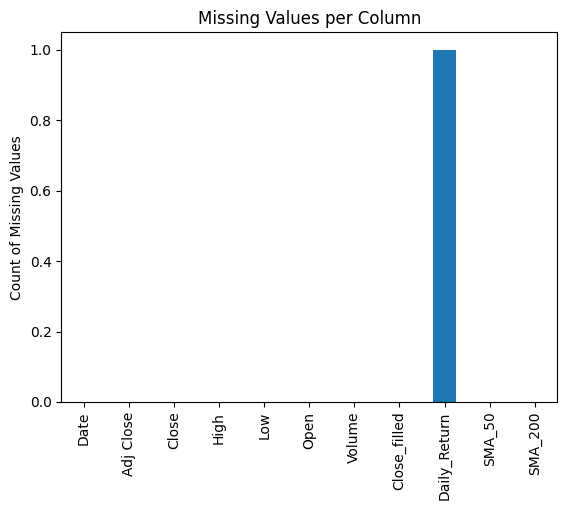

In [ ]:
import matplotlib.pyplot as plt

missing_counts_pd.T.plot(kind='bar', legend=False)
plt.ylabel("Count of Missing Values")
plt.title("Missing Values per Column")
plt.show()

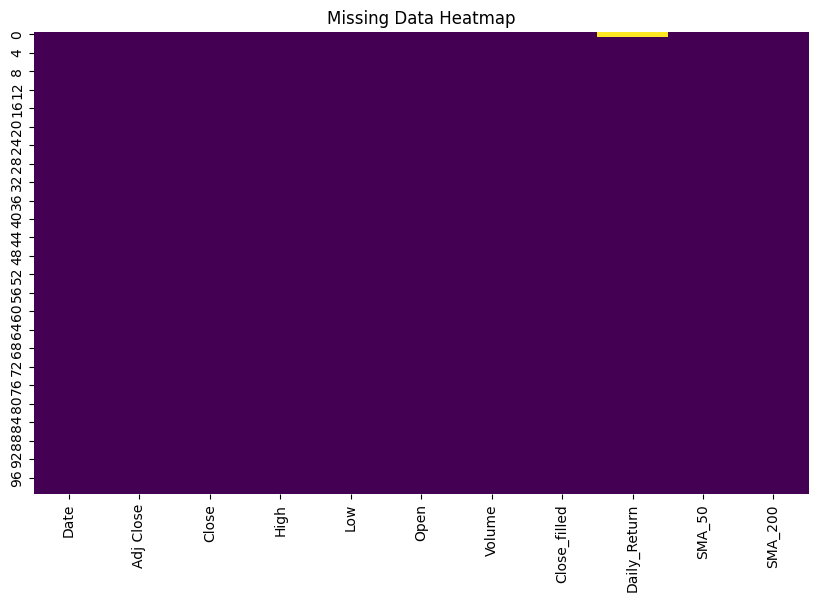

In [ ]:
import seaborn as sns

# Take a small sample for visualization
df_sample = df.limit(100).toPandas()

plt.figure(figsize=(10, 6))
sns.heatmap(df_sample.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

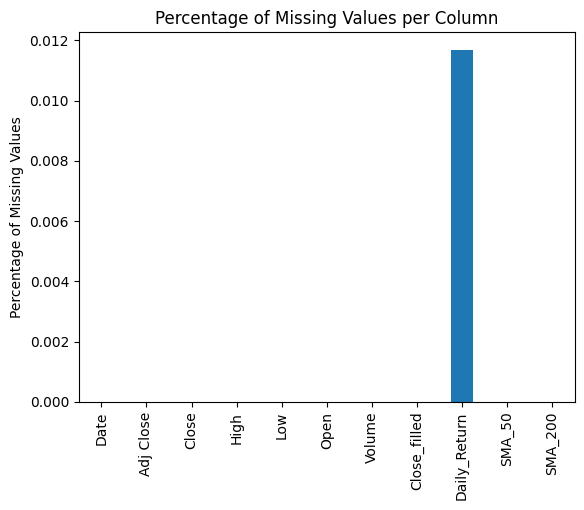

In [ ]:
missing_percentages_pd.T.plot(kind='bar', legend=False)
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")
plt.show()

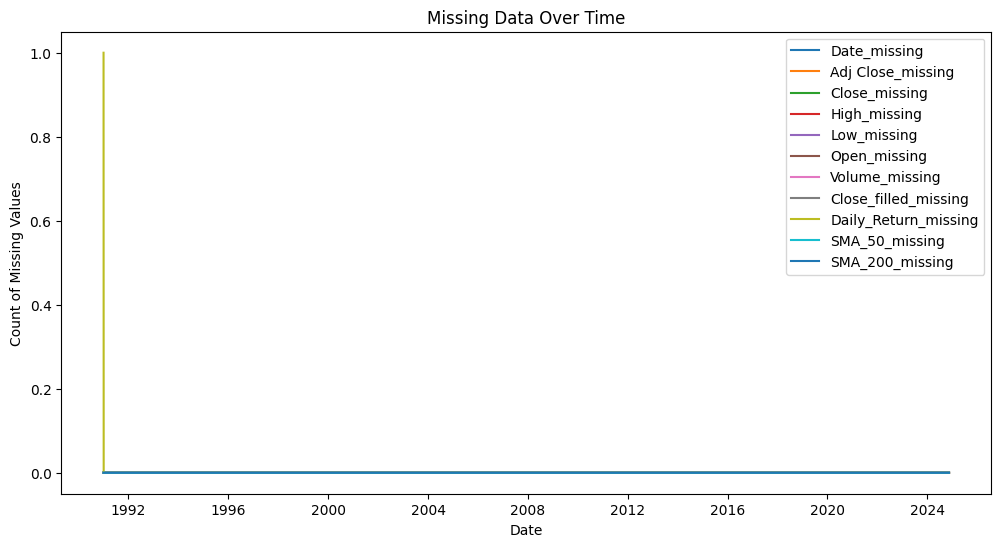

In [ ]:
# Missing values over time
df_missing_by_date = df.groupBy("Date").agg(
    *[sum(col(c).isNull().cast("int")).alias(c + "_missing") for c in df.columns]
)

df_missing_by_date_pd = df_missing_by_date.toPandas()

plt.figure(figsize=(12, 6))
for column in df_missing_by_date_pd.columns[1:]:
    plt.plot(df_missing_by_date_pd['Date'], df_missing_by_date_pd[column], label=column)
plt.xlabel("Date")
plt.ylabel("Count of Missing Values")
plt.title("Missing Data Over Time")
plt.legend()
plt.show()